In [1]:
from pylab import rcParams
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#4

Load dataset

In [2]:
features = [i for i in range(1,86)]
loc = r'/home/sadat/Documents/DSE/Data/HW4_210/Animals_with_Attributes/'
predicates = pd.read_csv(loc+'predicates.txt', delimiter='\t', names=['id','feature'])
classes = pd.read_csv(loc+'classes.txt', delimiter='\t', names=['id','animal'])
continuous = pd.read_fwf(loc+'predicate-matrix-continuous.txt', names=features)

Analyze the continuous dataset of classes vs features

In [3]:
continuous.head()

,1,2,3,4,5,6,7,8,9,10,...,76,77,78,79,80,81,82,83,84,85
0,-1.00,-1.00,-1,-1.00,12.34,0,0,0,16.11,9.19,...,0.00,0.00,1.23,10.49,39.24,17.57,50.59,2.35,9.70,8.38
1,39.25,1.39,0,74.14,3.75,0,0,0,1.25,0.00,...,7.64,9.79,53.14,61.80,12.50,24.00,3.12,58.64,20.14,11.39
2,83.40,64.79,0,0.00,1.25,0,0,0,68.49,32.69,...,79.49,0.00,0.00,38.27,9.77,52.03,24.94,15.77,13.41,15.42
3,19.38,0.00,0,87.81,7.50,0,0,0,0.00,7.50,...,65.62,0.00,0.00,3.75,31.88,41.88,23.44,31.88,33.44,13.12
4,69.58,73.33,0,6.39,0.00,0,0,0,37.08,100.00,...,1.25,6.25,0.00,9.38,31.67,53.26,24.44,29.38,11.25,72.71


Perform PCA to decompose from 85 dimensions to 2

In [6]:
pca = PCA(n_components=2)
pca.fit(continuous.values)
X = pca.transform(continuous.values)

In [7]:
df = pd.DataFrame(X)
df.head()

,0,1
0,14.332003,106.359925
1,-58.963086,-76.226820
2,170.087672,-139.366237
3,31.855826,-54.046382
4,-29.657535,-11.391705


Perform K Means of 10 clusters

In [9]:
km = KMeans(n_clusters=10)
km.fit(continuous.values)
clusters = km.predict(continuous.values)

class_array = classes['animal'].values
cluster_dict = {}
for i in range(50):
    try:
        cluster_dict[clusters[i]].append(class_array[i])
    except:
        cluster_dict[clusters[i]] = []
        cluster_dict[clusters[i]].append(class_array[i])

for i in range(len(cluster_dict)):
    print(str(i)+':',cluster_dict[i],'\n')

0: ['spider+monkey', 'gorilla', 'chimpanzee', 'squirrel', 'bat'] 

1: ['beaver', 'seal', 'otter', 'walrus', 'dolphin'] 

2: ['sheep', 'rabbit', 'zebra', 'giant+panda', 'cow'] 

3: ['grizzly+bear', 'polar+bear'] 

4: ['dalmatian', 'persian+cat', 'german+shepherd', 'siamese+cat', 'chihuahua', 'weasel', 'collie'] 

5: ['hippopotamus', 'elephant', 'ox', 'rhinoceros', 'buffalo', 'pig'] 

6: ['tiger', 'leopard', 'fox', 'wolf', 'bobcat', 'lion'] 

7: ['antelope', 'horse', 'moose', 'giraffe', 'deer'] 

8: ['killer+whale', 'blue+whale', 'humpback+whale'] 

9: ['skunk', 'mole', 'hamster', 'rat', 'mouse', 'raccoon'] 



Perform Hierarchial Clustering

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'b',
  'b'],
 'dcoord': [[0.0, 11.784922704184048, 11.784922704184048, 0.0],
  [0.0, 20.971131149753319, 20.971131149753319, 11.784922704184048],
  [0.0, 33.878175427152271, 33.878175427152271, 0.0],
  [20.971131149753319,
   52.128164403958024,
   52.128164403958024,
   33.878175427152271],
  [0.0, 17.308076288612256, 17.308076288612256, 0.0],
  [0.0, 11.240979534431256, 11.240979534431256, 0.0],
  [0.0, 24.239209326136518, 24.239209326136518, 11.240979534431256],
  [17.308076288612256,
   34.01256572133294,
   34.01256572133294,
   24.239209326136518],
  [0.0, 10.645138156497495, 10.645138156497495, 0.0],
  [0.0, 9.9740285591792972, 9.9740285591

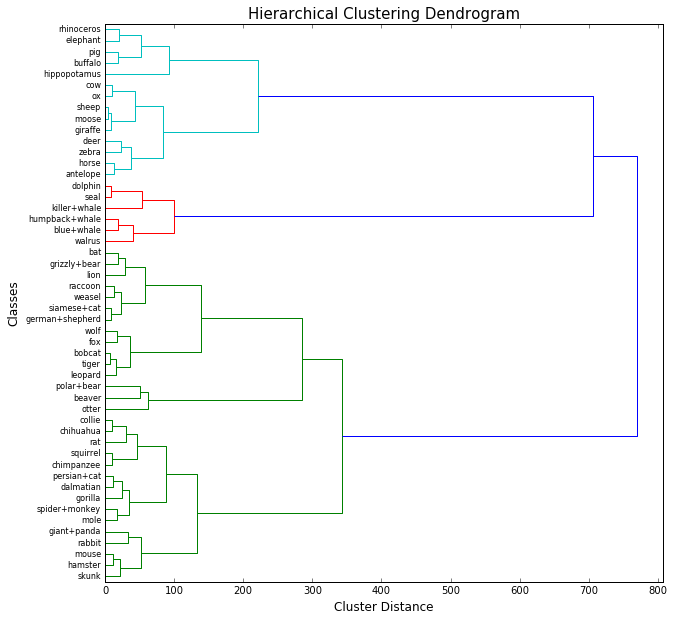

In [14]:
Z = linkage(X, 'ward')
rcParams[u'figure.figsize'] = [10, 10]
plt.title('Hierarchical Clustering Dendrogram', fontsize=15)
plt.xlabel('Cluster Distance', fontsize=12)
plt.ylabel('Classes', fontsize=12)
dendrogram(Z, orientation='right', labels=classes['animal'].values)

#5

In [3]:
from struct import unpack
import numpy as np
import matplotlib.pylab as plt 

def loadmnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

def displaychar(image):
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    #plt.show()

In [4]:
#Get file paths
path = r'/home/sadat/Documents/DSE/Data/HW3_210/'
train_img_path = path + 'train-images.idx3-ubyte'
train_lbl_path = path + 'train-labels.idx1-ubyte'

In [5]:
train_img, train_lbl = loadmnist(train_img_path, train_lbl_path)

In [6]:
df1 = pd.DataFrame(train_img)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
cov = np.cov(np.transpose(train_img))

In [8]:
df2 = pd.DataFrame(cov)
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
eigen_values = np.linalg.eigvals(cov)

In [10]:
denominator = np.sum(eigen_values)

def F(k):
    numerator = np.sum(eigen_values[k+1::])
    return numerator/denominator

In [11]:
k_list = [200, 150, 100, 50, 25]
for k in k_list:
    print str(k)+':\t',F(k)

200:	0.0332706860428
150:	0.0511769822288
100:	0.084387410268
50:	0.17216296616
25:	0.299801899793


In [85]:
_, eigen_vectors = np.linalg.eig(cov)

def image_PCA(k, image_id):    
    #Take 1000 images to PCA is fast
    image = train_img[:1000]
    U = eigen_vectors[:,:k+1]
    UUT = np.dot(U,U.T)
    image = image.T
    X = np.dot(UUT,image).T[image_id]
    X = X.reshape(28,28)

    #plot 
    plt.imshow(X, cmap=plt.cm.gray) 
    plt.title('%i' % k, fontsize = 20)
    plt.axis('off')

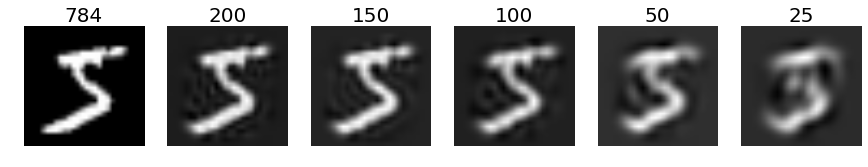

In [86]:
k_list = [784, 200, 150, 100, 50, 25]
index = 0
plt.figure(figsize=(15,5))
for k in k_list:
    index += 1
    plt.subplot(1, len(k_list), index)
    image_PCA(k,0)